<a href="https://colab.research.google.com/github/KsenyaDS/my-projects/blob/master/hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description (Описание проекта)

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

**Note:**

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

Inspiration:
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

# Data description (Описание данных)




*   enrollee_id : Unique ID for candidate
*   city: City code
*   city_ development _index : Developement index of the city (scaled)
*   gender: Gender of candidate
*   relevent_experience: Relevant experience of candidate

*   enrolled_university: Type of University course enrolled if any

*   education_level: Education level of candidate

*   major_discipline :Education major discipline of candidate

*   experience: Candidate total experience in years

*   company_size: No of employees in current employer's company

*   company_type : Type of current employer

*   lastnewjob: Difference in years between previous job and current job

*   training_hours: training hours completed

*   target: 0 – Not looking for job change, 1 – Looking for a job change


# Загрузка данных и библиотек

Загрузим архив с данными в папку. Скопируем ссылку на архив.

https://drive.google.com/file/d/1ht7DfNQiST0zsX_qDJxhTAQMq2C2eX7c/view?usp=sharing

Скачаем данные.

In [1]:
! gdown --id 1ht7DfNQiST0zsX_qDJxhTAQMq2C2eX7c

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ht7DfNQiST0zsX_qDJxhTAQMq2C2eX7c
To: /content/hr.zip
100% 302k/302k [00:00<00:00, 83.8MB/s]


Распакуем архив.

In [2]:
! unzip /content/hr.zip

Archive:  /content/hr.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


Установим необходимые библиотеки для работы.

In [3]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 91 kB/s 


In [4]:
!pip install phik


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 6.0 MB/s 


Импортируем все необходимые библиотеки для работы.

In [6]:
import phik
import time
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import matplotlib.pyplot as plt
from phik import resources, report
from phik.report import plot_correlation_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


# Исследовательский анализ данных (EDA)

На данном этапе изучим предоставленные данные. Посмотрим есть ли пропущенные значения, дубликаты, аномалии. Заполним пропущенные значения при их наличии. Определим типы данных и приведем данные к нужным типам. Для начала загрузим датасет.

In [7]:
df = pd.read_csv('/content/aug_train.csv')

Посмотрим на данные. 

In [8]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


При первичном ознакомлении с датасетом, замечаем, что:

*  есть пропущенные значения в данных 
*  в численных столбцах есть категориальные значения
*  в датасете 19158 строк, 14 столбцов



Проверим есть ли дубликаты в датасете. 

In [9]:
df.duplicated().sum()

0

Явных дубликатов нет. Посчитаем кол-во пропусков в датасете. 

In [10]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Отсортируем пропущенные значения в процентах по убыванию.

In [11]:
df_null = df.isnull().mean().sort_values(ascending=False)
df_null

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

Определим столбцы с пропусками.

In [12]:
null_columns = df.columns[df.isnull().any()]

Построим матрицу с пропущенными значениями.

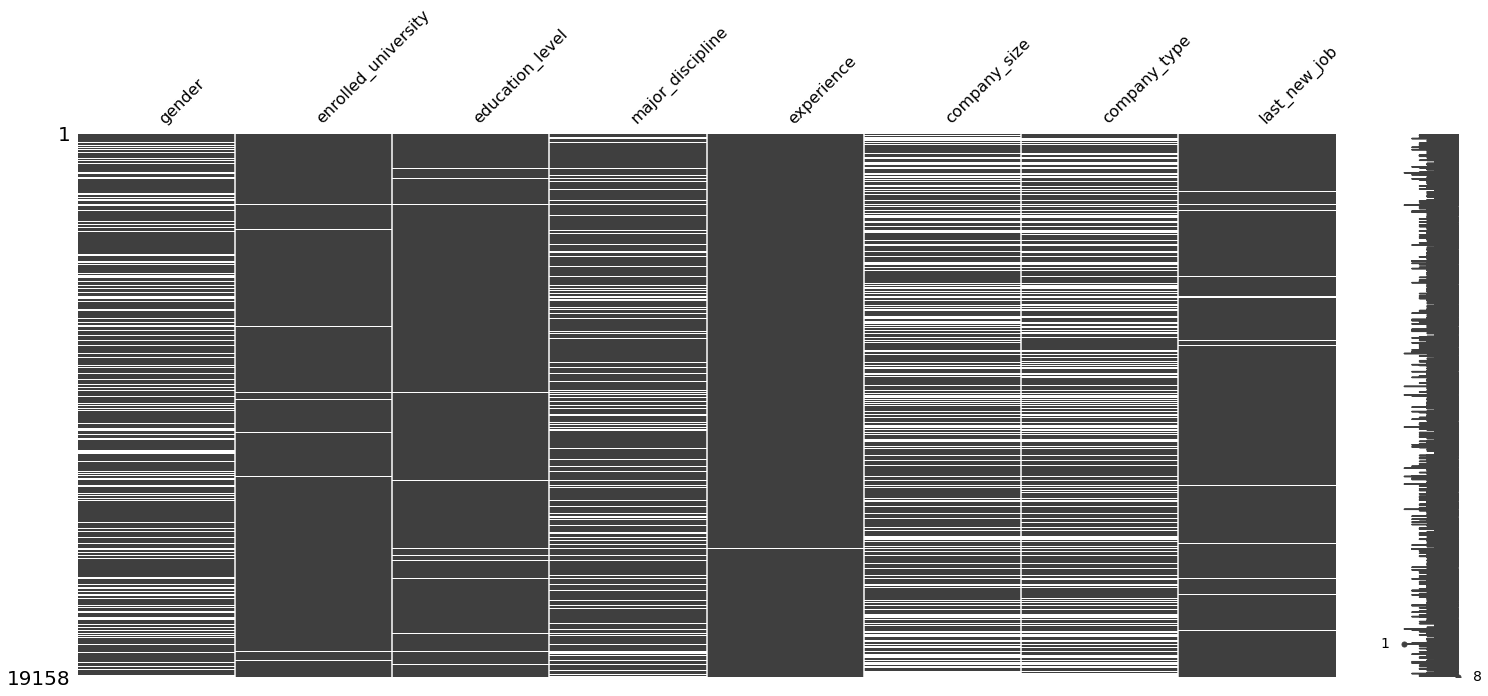

<Figure size 720x360 with 0 Axes>

In [13]:
msno.matrix(df[null_columns])
plt.figure(figsize =(10,5))
plt.show()

Замечаем, что пропущенные значения в столбцах company_type и company_cize немного взаимосвязаны. Определим наличие линейной зависимости между столбцами.

In [14]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['enrollee_id', 'city_development_index', 'training_hours', 'target']


Изучим полученную матрицу.

In [15]:
phik_overview

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,1.000000,0.214019,0.125181,0.080899,0.073145,0.051188,0.076123,0.030968,0.086949,0.032956,0.022543,0.045252,0.021517,0.067472
city,0.214019,1.000000,1.000000,0.168851,0.152621,0.376293,0.363706,0.178508,0.346552,0.249869,0.224174,0.240315,0.075165,0.477283
city_development_index,0.125181,1.000000,1.000000,0.062595,0.101448,0.245979,0.224368,0.129083,0.307770,0.130592,0.112234,0.172067,0.000000,0.482287
gender,0.080899,0.168851,0.062595,1.000000,0.034473,0.075682,0.070110,0.176281,0.117227,0.011700,0.114638,0.070741,0.025124,0.013202
relevent_experience,0.073145,0.152621,0.101448,0.034473,1.000000,0.237586,0.259716,0.098661,0.500107,0.074259,0.284810,0.539529,0.020727,0.199859
enrolled_university,0.051188,0.376293,0.245979,0.075682,0.237586,1.000000,0.215062,0.151561,0.434500,0.067175,0.231786,0.430596,0.000000,0.093803
education_level,0.076123,0.363706,0.224368,0.070110,0.259716,0.215062,1.000000,0.104318,0.302908,0.082131,0.116321,0.253235,0.030104,0.075999
major_discipline,0.030968,0.178508,0.129083,0.176281,0.098661,0.151561,0.104318,1.000000,0.116505,0.038923,0.089031,0.047317,0.000000,0.029200
experience,0.086949,0.346552,0.307770,0.117227,0.500107,0.434500,0.302908,0.116505,1.000000,0.127647,0.112121,0.468247,0.000000,0.238725
company_size,0.032956,0.249869,0.130592,0.011700,0.074259,0.067175,0.082131,0.038923,0.127647,1.000000,0.332074,0.102736,0.000000,0.071953


Рассмотрим тепловую карту на графике, чтобы можно было нагляднее увидеть как признаки зависят друг от друга.

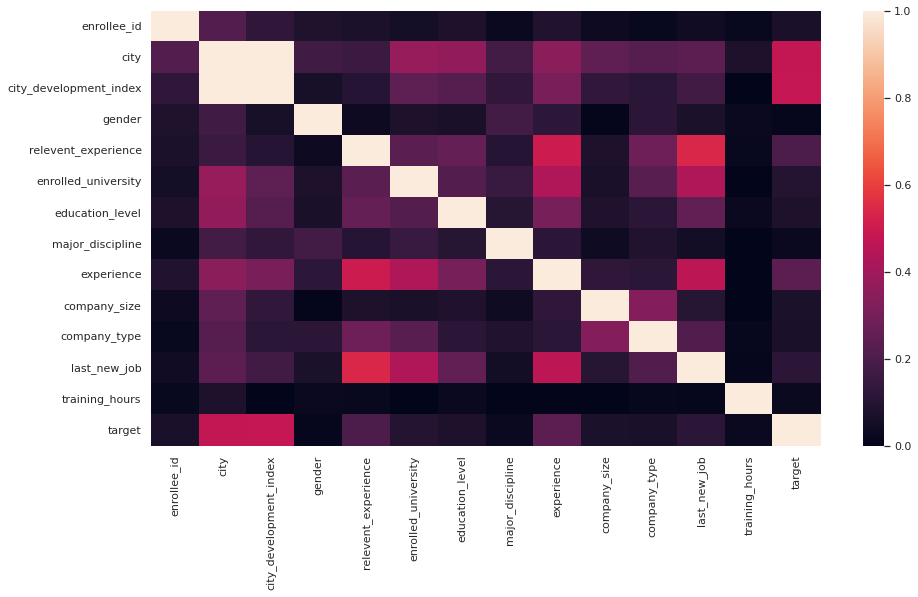

In [82]:
sns.heatmap(phik_overview)
sns.set(rc = {'figure.figsize':(15,8)})

Видим на графике, что присутствует мультиколлинеарность между столбцами city и city_development_index. 

Отсортируем по убыванию зависимость значений целевого признака от других столбцов.

In [17]:
phik = phik_overview['target'].sort_values(ascending=False)
phik

target                    1.000000
city_development_index    0.482287
city                      0.477283
experience                0.238725
relevent_experience       0.199859
last_new_job              0.114708
enrolled_university       0.093803
education_level           0.075999
company_size              0.071953
enrollee_id               0.067472
company_type              0.066792
major_discipline          0.029200
training_hours            0.026849
gender                    0.013202
Name: target, dtype: float64

Добавим в таблицу пропущенные значения в процентном соотношении, чтобы подумать, что можно сделать с пропусками.

In [18]:
result = pd.concat([phik, df_null], axis=1, join="inner")
result

,target,0
target,1.000000,0.000000
city_development_index,0.482287,0.000000
city,0.477283,0.000000
experience,0.238725,0.003393
relevent_experience,0.199859,0.000000
last_new_job,0.114708,0.022080
enrolled_university,0.093803,0.020148
education_level,0.075999,0.024011
company_size,0.071953,0.309949
enrollee_id,0.067472,0.000000


Как мы видим, у столбцов с большим объемом пропусков низкая зависимость от целевого признака. Пропуски можно обработать двумя способами. 1. Удалить пропущенные строки. 2. Заполнить значения на 'unknown' например. Обработаем пропуски двумя способами и сравним полученные результаты. Скопируем датафрейм.




In [19]:
df2 = df.copy()

Удалим пропуски.

In [20]:
df2 = df2.dropna()

В другом случае не будем удалять пропуски. Заполним пропущенные данные значением 'unknown'.

In [21]:
def null(columns):
  for column in null_columns:
    df[column]=df[column].fillna('unknown')

df.apply(null)

enrollee_id               None
city                      None
city_development_index    None
gender                    None
relevent_experience       None
enrolled_university       None
education_level           None
major_discipline          None
experience                None
company_size              None
company_type              None
last_new_job              None
training_hours            None
target                    None
dtype: object

Проверим пропущенные значения.

In [22]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [23]:
df2.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Изучим распределение данных в столбце city_development_index. Скопируем датафрейм в новую переменную.

In [24]:
t = df.copy()

Разобъем значения на 5 равных групп при помощи qcut, чтобы детальнее рассмотреть влияние данных на целевой признак.

In [25]:
t['city_development_index_']= pd.qcut(t['city_development_index'],5,duplicates='drop')

Сгруппируем полученный столбец по целевому признаку, посчитаем кол-во и среднее значение, отсортируем по убыванию.

In [26]:
t.groupby('city_development_index_')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
city_development_index_,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


Обнаруживаем закономерность, чем ниже индекс развития города, тем выше желание поменять работу. Также можем рассмотреть это на графике.

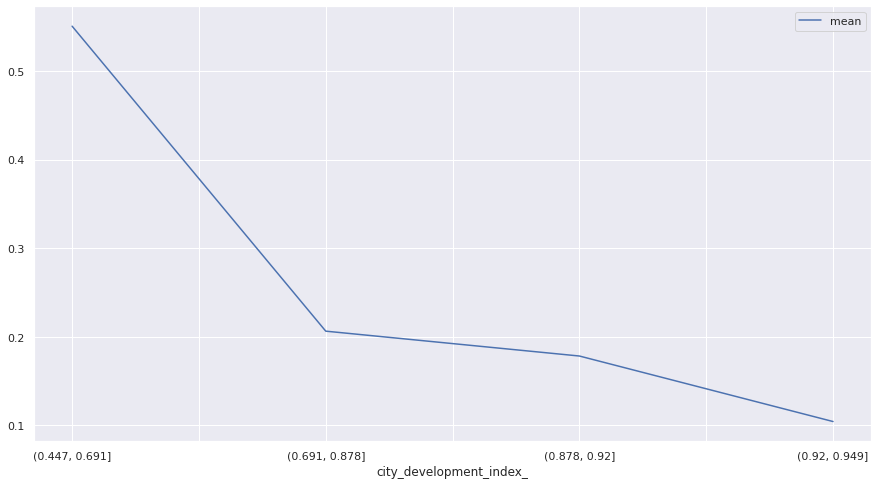

In [27]:
t.groupby('city_development_index_')['target'].agg(['mean']).plot()
plt.show()


Посмотрим, что со вторым датасетом. Сделаем теже операции, как и с первым датасетом.

In [28]:
t = df2.copy()

In [29]:
t['city_development_index_']= pd.qcut(t['city_development_index'],5,duplicates='drop')

In [30]:
t.groupby('city_development_index_')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
city_development_index_,,
"(0.447, 0.738]",1800,0.472222
"(0.738, 0.897]",1953,0.092678
"(0.897, 0.92]",3950,0.088861
"(0.92, 0.949]",1252,0.080671


Видим еще более выраженную связь в данных после удаления пропусков, чем ниже индекс развития города, тем выше желание поменять работу. 

На тепловой карте мы заметили, что есть зависимость между признаками city и city_development_index. Проверим это на данных. Сгруппируем данные по городу, индексу города и целевому признаку.

In [31]:
t = df.groupby('city')[['target','city_development_index']].agg(['count', 'mean'])

Посмотрим, что получилось.

In [32]:
t.head()

target           city_development_index       
          count      mean                  count   mean
city                                                   
city_1       26  0.115385                     26  0.847
city_10      86  0.104651                     86  0.895
city_100    275  0.236364                    275  0.887
city_101     75  0.573333                     75  0.558
city_102    304  0.171053                    304  0.804

Видна зависимость между признаками city и city_development_index. Для полной убедительности, проверим данные по самым крупным городам. Удалим мультииндекс из таблицы.

In [33]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

Отсортируем по кол-ву людей.

In [34]:
t.sort_values(by='target_count',ascending=False).head()

,target_count,target_mean,city_development_index_count,city_development_index_mean
city,,,,
city_103,4355,0.213088,4355,0.920
city_21,2702,0.591044,2702,0.624
city_16,1533,0.116765,1533,0.910
city_114,1336,0.099551,1336,0.926
city_160,845,0.235503,845,0.920


Действительно, столбцы зависят друг от друга. Удалим столбец city, который коррелирует со столбцом city_development_index, а также ненужный столбец enrollee_id.

In [35]:
df = df.drop(['enrollee_id','city'], axis=1) 
df2 = df2.drop(['enrollee_id','city'], axis=1) 

Посмотрим на распределение данных в столбце experience.

In [36]:
df.groupby('experience')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
experience,,
<1,522,0.454023
1,549,0.424408
unknown,65,0.353846
3,1354,0.353028
2,1127,0.331854
4,1403,0.325731
7,1028,0.294747
5,1430,0.288112
6,1216,0.282072


Замечаем, что большинство значений числовые, но есть и строковые. Заменим строковые значения на числовые в обоих датасетах.

In [37]:
df['experience'] = df['experience'].replace('<1','0')
df['experience'] = df['experience'].replace('>20','21')
df['experience'] = df['experience'].replace('unknown','-1')
df2['experience'] = df2['experience'].replace('<1','0')
df2['experience'] = df2['experience'].replace('>20','21')
df2['experience'] = df2['experience'].replace('unknown','-1')

Приведем столбцы к типу int.

In [38]:
df['experience'] = df['experience'].astype('int')
df2['experience'] = df['experience'].astype('int')

Разобъем значения на 5 равных групп при помощи qcut, чтобы детальнее рассмотреть влияние данных на целевой признак. Cкопируем датасет. Создадим в нем новый столбец с группами. Рассмотрим полученный результат.

In [39]:
t = df.copy()

In [40]:
t['experience_q'] = pd.qcut(df['experience'],5,duplicates='drop')

In [41]:
t.groupby('experience_q')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
experience_q,,
"(-1.001, 4.0]",5020,0.358964
"(4.0, 6.0]",2646,0.285336
"(6.0, 11.0]",4459,0.239740
"(11.0, 18.0]",3295,0.170561
"(18.0, 21.0]",3738,0.157571


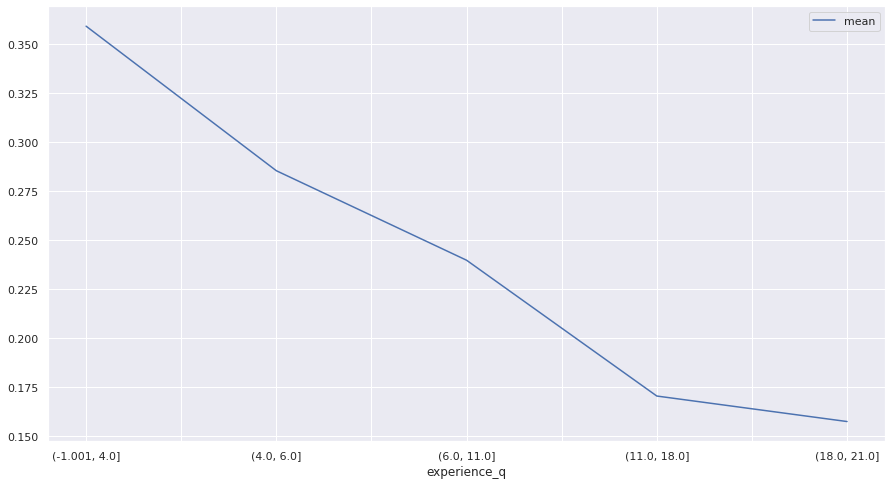

In [42]:
t.groupby('experience_q')['target'].agg(['mean']).plot()
plt.show()

Как мы видим, есть зависимость от наличия опыта. Чем больше опыта, тем меньше желание сменить работу. Проверим данные во втором датафрейме.

In [43]:
t = df2.copy()
t['experience_q'] = pd.qcut(df['experience'],5,duplicates='drop')
t.groupby('experience_q')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
experience_q,,
"(-1.001, 4.0]",1423,0.285313
"(4.0, 6.0]",1110,0.233333
"(6.0, 11.0]",2339,0.178709
"(11.0, 18.0]",1937,0.121322
"(18.0, 21.0]",2146,0.076887


При удалении пропусков зависимость целевого признака от опыта примерно такая же.

Посмотрим на распределение данных в столбце last_new_job.

In [44]:
df.groupby('last_new_job')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
last_new_job,,
unknown,423,0.364066
never,2452,0.301387
1,8040,0.264303
2,2900,0.241379
3,1024,0.225586
4,1029,0.221574
>4,3290,0.182371


Замечаем прямую зависимость от кол-во проведенных лет на работе. Чем больше человек работает в компании, тем меньше желание уйти с работы. Посмотрим на распределение данных во втором датасете.

In [45]:
df2.groupby('last_new_job')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
last_new_job,,
never,373,0.257373
2,1570,0.177707
1,3838,0.177697
4,599,0.168614
3,610,0.167213
>4,1965,0.113486


Видим, что в втором датасете данные немного различаются. Заменим строковые значения на числовые в обоих датасетах. И приведем столбцы к типу integer.

In [46]:
df['last_new_job'] = df['last_new_job'].replace('never','0').replace('>4','30').replace('unknown','-1')
df2['last_new_job'] = df2['last_new_job'].replace('never','0').replace('>4','30').replace('unknown','-1')

In [47]:
df['last_new_job'] = df['last_new_job'].astype('int')
df2['last_new_job'] = df2['last_new_job'].astype('int')

Посмотрим на распределение данных в столбце gender.

In [48]:
df.groupby('gender')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
gender,,
unknown,4508,0.308119
Female,1238,0.263328
Other,191,0.261780
Male,13221,0.227819


Замечаем, что больше всего значений unknown. Кол-во женщин желающих сменить место работы, больше чем мужчин. При этом кол-во мужчин намного меньше, чем женщин.

In [49]:
df2.groupby('gender')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
gender,,
Male,8073,0.165985
Female,804,0.162935
Other,78,0.153846


Во втором датасете распределение данных чуть другое, наоборот мужчин, желащих сменить работу больше чем женщин.

Посмотрим на распределение данных в столбце company_size.

In [50]:
df.groupby('company_size')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
company_size,,
unknown,5938,0.405861
10/49,1471,0.233855
10000+,2019,0.190688
5000-9999,563,0.181172
50-99,3083,0.176776
500-999,877,0.173318
<10,1308,0.171254
100-500,2571,0.161416
1000-4999,1328,0.150602


Наибольшее значение целевого признака наблюдается у тех, кто не заполнил данные о размере компании. В целом не обнаруживаем взаимосвязи между размером компании и желанием сменить работу.

In [51]:
df2.groupby('company_size')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
company_size,,
10/49,951,0.206099
10000+,1449,0.182885
50-99,1986,0.164149
500-999,592,0.157095
100-500,1814,0.155458
5000-9999,393,0.150127
<10,840,0.150000
1000-4999,930,0.146237


Также нет взаимосвязи между размером компании и желанием сменить работу. Заменим значение 10/49 на 10-49.

In [52]:
df['company_size'] = df['company_size'].replace('10/49','10-49')
df2['company_size'] = df2['company_size'].replace('10/49','10-49')

Посмотрим на распределение данных в столбце training_hours.

In [53]:
df.groupby('training_hours')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
training_hours,,
286,5,0.600000
228,7,0.571429
298,13,0.461538
258,13,0.461538
268,11,0.454545
...,...,...
276,6,0.000000
242,12,0.000000
238,4,0.000000


Разобъем значения на 5 равных групп при помощи qcut, чтобы детальнее рассмотреть влияние данных на целевой признак. Cкопируем датасет. Создадим в нем новый столбец с группами. Рассмотрим полученный результат.

In [54]:
t['training_hours_q']= pd.qcut(t['training_hours'],5,duplicates='drop')

In [55]:
t.groupby('training_hours_q')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
training_hours_q,,
"(0.999, 19.0]",1811,0.173937
"(36.0, 58.0]",1789,0.172722
"(19.0, 36.0]",1808,0.167035
"(100.0, 336.0]",1779,0.160202
"(58.0, 100.0]",1768,0.153846


Видим, что среднее значение у всех групп примерно одинаковое. Прямой зависимости от часов не наблюдается. Сделаем тоже самое со вторым датасетом.

In [56]:
t = df2.copy()
t['training_hours_q']= pd.qcut(t['training_hours'],5,duplicates='drop')
t.groupby('training_hours_q')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
training_hours_q,,
"(0.999, 19.0]",1811,0.173937
"(36.0, 58.0]",1789,0.172722
"(19.0, 36.0]",1808,0.167035
"(100.0, 336.0]",1779,0.160202
"(58.0, 100.0]",1768,0.153846


Посмотрим на распределение данных в столбце education_level.

In [57]:
df.groupby('education_level')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
education_level,,
Graduate,11598,0.279790
unknown,460,0.226087
Masters,4361,0.214400
High School,2017,0.195340
Phd,414,0.140097
Primary School,308,0.133117


Нет никакой взаимосвязи между уровней образования и уходом с работы.

In [58]:
df2.groupby('education_level')['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False)

,count,mean
education_level,,
Graduate,6252,0.174664
Masters,2449,0.145774
Phd,254,0.133858


В датасете с пропусками были удалены некоторые группы. В данных прослеживается зависимость, чем меньше степень обучения, тем больше желание покинуть работу.

Посмотрим на распределение данных в оставшихся столбцах.

In [59]:
columns = [ 'enrolled_university',
        'major_discipline', 'company_type']
for column in columns:
  display(df.groupby(column)['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False))

,count,mean
enrolled_university,,
Full time course,3757,0.380889
unknown,386,0.318653
Part time course,1198,0.252087
no_enrollment,13817,0.211406


,count,mean
major_discipline,,
Other,381,0.267717
Business Degree,327,0.262997
STEM,14492,0.261593
No Major,223,0.246637
Humanities,669,0.210762
Arts,253,0.209486
unknown,2813,0.195165


,count,mean
company_type,,
unknown,6140,0.388274
Other,121,0.239669
Early Stage Startup,603,0.235489
Public Sector,955,0.219895
NGO,521,0.186180
Pvt Ltd,9817,0.180809
Funded Startup,1001,0.139860


Посмотрим на распределение данных в оставшихся столбцах второго датасета, из которого удалили пропуски.

In [60]:
for column in columns:
  display(df2.groupby(column)['target'].agg(['count', 'mean']).sort_values(by='mean',ascending=False))

,count,mean
enrolled_university,,
Full time course,832,0.278846
Part time course,529,0.155009
no_enrollment,7594,0.153937


,count,mean
major_discipline,,
STEM,7989,0.172612
No Major,112,0.133929
Business Degree,170,0.123529
Other,177,0.107345
Humanities,378,0.105820
Arts,129,0.069767


,count,mean
company_type,,
Other,72,0.208333
Early Stage Startup,385,0.202597
Pvt Ltd,6794,0.166765
Public Sector,564,0.166667
NGO,356,0.154494
Funded Startup,784,0.137755


В признаке enrolled_university замечаем, что у людей, обучающихся очно в университете, намного выше значение целевого признака, по сравнению с людьми, которые обучались с частичной занятостью. В остальных столбцах нет никаких интересных наблюдений. 

## Вывод

в результате анализа данных:

*   обработали пропуски двумя способами: в первом случае заполнили значением 'unknown', во втором случае удалили их.
*   привели некоторые столбцы к числовому типу int.
*   удалили ненужные признаки.

выявили, что:

*   чем ниже индекс развития города, тем выше желание поменять работу.
*   чем больше опыта, тем меньше желание сменить работу. 
*   чем дольше человек работает в компании, тем меньше желание уйти с работы.
*   присутствует мультиколлинеарность между столбцами city и city_development_index.
*   распределение данных, в некоторых признаках значительно отличается из-за различного способа обработки пропусков 









# Подготовка данных к построению модели

Посмотрим на датасет.

Изучим общую информацию о данных. 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     19158 non-null  object 
 4   education_level         19158 non-null  object 
 5   major_discipline        19158 non-null  object 
 6   experience              19158 non-null  int64  
 7   company_size            19158 non-null  object 
 8   company_type            19158 non-null  object 
 9   last_new_job            19158 non-null  int64  
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.8+ MB


Определим категориальные признаки и закодируем их.

In [62]:
cat_features = df.select_dtypes(include='object').columns

label_encode = LabelEncoder()
for column in cat_features:
    label_encode.fit(df[column].astype('str'))
    df[column] = label_encode.transform(df[column].astype('str'))
    label_encode.fit(df2[column].astype('str'))
    df2[column] = label_encode.transform(df2[column].astype('str'))

Определим целевой и другие признаки в обоих датасетах.

In [63]:
features = df.drop(['target'],axis=1)
target = df['target']
features2 = df2.drop(['target'],axis=1)
target2 = df2['target']

Разделим данные на обучающую и тестовую выборки.

In [64]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state=12345)
features_train2, features_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size = 0.2, random_state=12345)

Определим численные признаки и масштабируем их.

In [65]:
num_features = features.select_dtypes(exclude='object').columns
scaler=StandardScaler()
scaler.fit(features_train[num_features])
features_train[num_features]=scaler.transform(features_train[num_features])
features_test[num_features]=scaler.transform(features_test[num_features])
scaler.fit(features_train2[num_features])
features_train2[num_features]=scaler.transform(features_train2[num_features])
features_test2[num_features]=scaler.transform(features_test2[num_features])

Изучим распределение данных в целевом столбце датафрейма, где мы заполнили пропуски.

In [66]:
df['target'].value_counts() 
df['target'].mean() 

0.24934753105752167

Изучим распределение данных целевого столбца в датафрейме, где мы удалили пропуски. 

In [67]:
df2['target'].value_counts() 
df2['target'].mean() 

0.16560580681183695

Значит классы несбалансированы. Видим насколько различаются данные при разных способах удаления пропущенных значений. При удалении данных ушло много строк с нулевым целевым признаком, поэтому среднее значение уменьшилось. Будем балансировать данные с помощью функций downsample, upsample или прописывать class_weight = 'balanced'.

In [68]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

In [69]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

## Вывод

На данном этапе подготовили исходные данные для построения моделей:

* распределили данные на обучающую и тестовую выборки
* обнаружили, что данные не сбалансированы
* определили целевой и другие признаки
* закодировали категориальные признаки
* масштабировали численные признаки 


# Построение моделей

Задача проекта - определить собирается уходить cпециалист с работы или нет. Это задача классификации. Поэтому мы будем применять в работе такие модели, как CatBoostClassifier, LGBMClassifier, DecisionTreeClassifier, RandomForestClassifier. Данные несбалансированы. Искать гиперпараметры будем с помощью функции GridSearchCV.

Найдем лучшие параметры для модели CatBoostClassifier с помощью функции GridSearchCV.

In [70]:
model = CatBoostClassifier(random_state=12345)
params_rfc = {"iterations": [1, 101, 10],
          "depth": [1,21,5],
          "learning_rate": [0.03, 0.1]}
CBC = GridSearchCV(model, params_rfc, cv=3)
CBC.fit(features_train,target_train)
print(CBC.best_params_)
print(CBC.best_score_)

0:	learn: 0.6833533	total: 47.9ms	remaining: 0us
0:	learn: 0.6832682	total: 1.12ms	remaining: 0us
0:	learn: 0.6831118	total: 1.03ms	remaining: 0us
0:	learn: 0.6616807	total: 1.06ms	remaining: 0us
0:	learn: 0.6614093	total: 1.11ms	remaining: 0us
0:	learn: 0.6608873	total: 1.05ms	remaining: 0us
0:	learn: 0.6833533	total: 1.1ms	remaining: 110ms
1:	learn: 0.6739547	total: 3.07ms	remaining: 152ms
2:	learn: 0.6650948	total: 4.53ms	remaining: 148ms
3:	learn: 0.6569560	total: 5.89ms	remaining: 143ms
4:	learn: 0.6490623	total: 7.25ms	remaining: 139ms
5:	learn: 0.6414852	total: 8.54ms	remaining: 135ms
6:	learn: 0.6345583	total: 9.84ms	remaining: 132ms
7:	learn: 0.6277909	total: 11.1ms	remaining: 129ms
8:	learn: 0.6215857	total: 12.2ms	remaining: 124ms
9:	learn: 0.6157944	total: 13.4ms	remaining: 122ms
10:	learn: 0.6104860	total: 14.8ms	remaining: 121ms
11:	learn: 0.6049338	total: 16.2ms	remaining: 120ms
12:	learn: 0.5996900	total: 17.5ms	remaining: 118ms
13:	learn: 0.5950700	total: 18.8ms	remain

Обучим модель CatBoostClassifier с подобранными параметрами.



In [71]:
model = CatBoostClassifier(random_state=12345,depth=5, iterations=101, learning_rate= 0.1)
model.fit(features_train, target_train)
model.fit(features_train, target_train)
probabilities_test= model.predict_proba(features_test)[:, 1]
probabilities_test2= model.predict_proba(features_test2)[:, 1]
start= time.time()
start2= time.time()
predictions_test = model.predict(features_test)
predictions_test2 = model.predict(features_test2)
end= time.time()
end2= time.time()
cbc_time_predictions_test = end - start
cbc_time_predictions_test2 = end2 - start2
probabilities_train = model.predict_proba(features_train)[:, 1]
probabilities_train2 = model.predict_proba(features_train2)[:, 1]
start= time.time()
start2= time.time()
predictions_train = model.predict(features_train)
predictions_train2 = model.predict(features_train2)
end= time.time()
end2= time.time()
cbc_time_predictions_train = end - start
cbc_time_predictions_train2 = end2 - start2
auc_roc_cbc_test = roc_auc_score(target_test, probabilities_test)
auc_roc_cbc_train = roc_auc_score(target_train, probabilities_train)
accuracy_cbc_test = accuracy_score(target_test, predictions_test)
accuracy_cbc_train = accuracy_score(target_train, predictions_train)

auc_roc_cbc_test2 = roc_auc_score(target_test2, probabilities_test2)
auc_roc_cbc_train2 = roc_auc_score(target_train2, probabilities_train2)
accuracy_cbc_test2 = accuracy_score(target_test2, predictions_test2)
accuracy_cbc_train2 = accuracy_score(target_train2, predictions_train2)
print('Расчеты для датасета с заполнением пропусков')
print(auc_roc_cbc_test,'- AUC ROC модели CatBoostClassifier на тестовой выборке')
print(auc_roc_cbc_train,'- AUC ROC модели CatBoostClassifier на обучающей выборке')
print(accuracy_cbc_test, '- Accuracy модели CatBoostClassifier на тестовой выборке')
print(accuracy_cbc_train, '- Accuracy модели CatBoostClassifier на обучающей выборке')
print(cbc_time_predictions_test, '- Время предсказания модели CatBoostClassifier на обучающей выборке')
print(cbc_time_predictions_train, '- Время предсказания модели CatBoostClassifier на тестовой выборке')

print('Расчеты для датасета с удаленим пропусков')
print(auc_roc_cbc_test2,'- AUC ROC модели CatBoostClassifier на тестовой выборке')
print(auc_roc_cbc_train2,'- AUC ROC модели CatBoostClassifier на обучающей выборке')
print(accuracy_cbc_test2, '- Accuracy модели CatBoostClassifier на тестовой выборке')
print(accuracy_cbc_train2, '- Accuracy модели CatBoostClassifier на обучающей выборке')
print(cbc_time_predictions_test2, '- Время предсказания модели CatBoostClassifier на обучающей выборке')
print(cbc_time_predictions_train2, '- Время предсказания модели CatBoostClassifier на тестовой выборке')

0:	learn: 0.6555185	total: 16.5ms	remaining: 1.65s
1:	learn: 0.6268937	total: 21.4ms	remaining: 1.06s
2:	learn: 0.6017578	total: 50.3ms	remaining: 1.64s
3:	learn: 0.5793800	total: 82.7ms	remaining: 2.01s
4:	learn: 0.5603242	total: 103ms	remaining: 1.98s
5:	learn: 0.5438748	total: 119ms	remaining: 1.89s
6:	learn: 0.5294545	total: 137ms	remaining: 1.84s
7:	learn: 0.5173197	total: 145ms	remaining: 1.69s
8:	learn: 0.5070790	total: 170ms	remaining: 1.74s
9:	learn: 0.4978564	total: 185ms	remaining: 1.68s
10:	learn: 0.4898781	total: 203ms	remaining: 1.66s
11:	learn: 0.4830664	total: 217ms	remaining: 1.61s
12:	learn: 0.4771866	total: 229ms	remaining: 1.55s
13:	learn: 0.4727645	total: 245ms	remaining: 1.52s
14:	learn: 0.4687954	total: 253ms	remaining: 1.45s
15:	learn: 0.4659597	total: 255ms	remaining: 1.36s
16:	learn: 0.4627615	total: 260ms	remaining: 1.28s
17:	learn: 0.4597359	total: 268ms	remaining: 1.24s
18:	learn: 0.4577847	total: 273ms	remaining: 1.18s
19:	learn: 0.4556202	total: 276ms	rem

Найдем лучшие параметры для модели LGBMClassifier с помощью функции GridSearchCV.

In [72]:
model = LGBMClassifier(random_state=12345)
params_lgbm = {'learning_rate':[0.03, 0.1], 'n_estimators':(1,1000,100)}
LGBM = GridSearchCV(model, params_lgbm, cv=3)
LGBM.fit(features_train,target_train)
print(LGBM.best_params_)
print(LGBM.best_score_)

{'learning_rate': 0.03, 'n_estimators': 100}
0.7963593479428542


Обучим модель LGBMClassifier с подобранными параметрами.


In [73]:
model = LGBMClassifier(random_state=12345, learning_rate= 0.03, n_estimators = 100)
model.fit(features_train, target_train)
probabilities_test= model.predict_proba(features_test)[:, 1]
probabilities_test2= model.predict_proba(features_test2)[:, 1]
start= time.time()
start2= time.time()
predictions_test = model.predict(features_test)
predictions_test2 = model.predict(features_test2)
end= time.time()
end2= time.time()
lgbm_time_predictions_test = end - start
lgbm_time_predictions_test2 = end2 - start2
probabilities_train = model.predict_proba(features_train)[:, 1]
probabilities_train2 = model.predict_proba(features_train2)[:, 1]
start= time.time()
start2= time.time()
predictions_train = model.predict(features_train)
predictions_train2 = model.predict(features_train2)
end= time.time()
end2= time.time()
lgbm_time_predictions_train = end - start
lgbm_time_predictions_train2 = end2 - start2
auc_roc_lgbm_test = roc_auc_score(target_test, probabilities_test)
auc_roc_lgbm_train = roc_auc_score(target_train, probabilities_train)
accuracy_lgbm_test = accuracy_score(target_test, predictions_test)
accuracy_lgbm_train = accuracy_score(target_train, predictions_train)

auc_roc_lgbm_test2 = roc_auc_score(target_test2, probabilities_test2)
auc_roc_lgbm_train2 = roc_auc_score(target_train2, probabilities_train2)
accuracy_lgbm_test2 = accuracy_score(target_test2, predictions_test2)
accuracy_lgbm_train2 = accuracy_score(target_train2, predictions_train2)
print('Расчеты для датасета с заполнением пропусков')
print(auc_roc_lgbm_test,'- AUC ROC модели LGBMClassifier на тестовой выборке')
print(auc_roc_lgbm_train,'- AUC ROC модели LGBMClassifier на обучающей выборке')
print(accuracy_lgbm_test, '- Accuracy модели LGBMClassifier на тестовой выборке')
print(accuracy_lgbm_train, '- Accuracy модели LGBMClassifier на обучающей выборке')
print(lgbm_time_predictions_test, '- Время предсказания модели LGBMClassifier на обучающей выборке')
print(lgbm_time_predictions_train, '- Время предсказания модели LGBMClassifier на тестовой выборке')
print('Расчеты для датасета с удалением пропусков')
print(auc_roc_lgbm_test2,'- AUC ROC модели LGBMClassifier на тестовой выборке')
print(auc_roc_lgbm_train2,'- AUC ROC модели LGBMClassifier на обучающей выборке')
print(accuracy_lgbm_test2, '- Accuracy модели LGBMClassifier на тестовой выборке')
print(accuracy_lgbm_train2, '- Accuracy модели LGBMClassifier на обучающей выборке')
print(lgbm_time_predictions_test2, '- Время предсказания модели LGBMClassifier на обучающей выборке')
print(lgbm_time_predictions_train2, '- Время предсказания модели LGBMClassifier на тестовой выборке')

Расчеты для датасета с заполнением пропусков
0.8119914437479767 - AUC ROC модели LGBMClassifier на тестовой выборке
0.8391364615161576 - AUC ROC модели LGBMClassifier на обучающей выборке
0.8055845511482255 - Accuracy модели LGBMClassifier на тестовой выборке
0.810126582278481 - Accuracy модели LGBMClassifier на обучающей выборке
0.024688005447387695 - Время предсказания модели LGBMClassifier на обучающей выборке
0.08539843559265137 - Время предсказания модели LGBMClassifier на тестовой выборке
Расчеты для датасета с удалением пропусков
0.746553785813364 - AUC ROC модели LGBMClassifier на тестовой выборке
0.7752441238987113 - AUC ROC модели LGBMClassifier на обучающей выборке
0.8486878838637633 - Accuracy модели LGBMClassifier на тестовой выборке
0.8570630932439978 - Accuracy модели LGBMClassifier на обучающей выборке
0.024686813354492188 - Время предсказания модели LGBMClassifier на обучающей выборке
0.08539390563964844 - Время предсказания модели LGBMClassifier на тестовой выборке


Найдем лучшие параметры для модели DecisionTreeClassifier с помощью функции GridSearchCV.

In [74]:
model = DecisionTreeClassifier(random_state=12345)
params_dtc = {'max_depth':[1,30,6],'min_samples_split':[1,30,6],'min_samples_leaf':[1,30,6]}
DTC = GridSearchCV(model, params_dtc,cv=3)
DTC.fit(features_train,target_train)
print(DTC.best_params_)
print(DTC.best_score_)

{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 30}
0.7863110681530524


Обучим модель DecisionTreeClassifier с подобранными параметрами.

In [75]:
model = DecisionTreeClassifier(random_state=12345, max_depth = 6, min_samples_leaf = 6, min_samples_split = 30)
model.fit(features_train, target_train)
probabilities_test= model.predict_proba(features_test)[:, 1]
probabilities_test2= model.predict_proba(features_test2)[:, 1]
start= time.time()
start2= time.time()
predictions_test = model.predict(features_test)
predictions_test2 = model.predict(features_test2)
end= time.time()
end2= time.time()
dtc_time_predictions_test = end - start
dtc_time_predictions_test2 = end2 - start2
probabilities_train = model.predict_proba(features_train)[:, 1]
probabilities_train2 = model.predict_proba(features_train2)[:, 1]
start= time.time()
start2= time.time()
predictions_train = model.predict(features_train)
predictions_train2 = model.predict(features_train2)
end= time.time()
end2= time.time()
dtc_time_predictions_train = end - start
dtc_time_predictions_train2 = end2 - start2
auc_roc_dtc_test = roc_auc_score(target_test, probabilities_test)
auc_roc_dtc_train = roc_auc_score(target_train, probabilities_train)
accuracy_dtc_test = accuracy_score(target_test, predictions_test)
accuracy_dtc_train = accuracy_score(target_train, predictions_train)

auc_roc_dtc_test2 = roc_auc_score(target_test2, probabilities_test2)
auc_roc_dtc_train2 = roc_auc_score(target_train2, probabilities_train2)
accuracy_dtc_test2 = accuracy_score(target_test2, predictions_test2)
accuracy_dtc_train2 = accuracy_score(target_train2, predictions_train2)
print('Расчеты для датасета с заполнением пропусков')
print(auc_roc_dtc_test,'- AUC ROC модели DecisionTreeClassifier на тестовой выборке')
print(auc_roc_dtc_train,'- AUC ROC модели DecisionTreeClassifier на обучающей выборке')
print(accuracy_dtc_test, '- Accuracy модели DecisionTreeClassifier на тестовой выборке')
print(accuracy_dtc_train, '- Accuracy модели DecisionTreeClassifier на обучающей выборке')
print(dtc_time_predictions_test, '- Время предсказания модели DecisionTreeClassifier на обучающей выборке')
print(dtc_time_predictions_train, '- Время предсказания модели DecisionTreeClassifier на тестовой выборке')
print('Расчеты для датасета с удалением пропусков')
print(auc_roc_dtc_test2,'- AUC ROC модели DecisionTreeClassifier на тестовой выборке')
print(auc_roc_dtc_train2,'- AUC ROC модели DecisionTreeClassifier на обучающей выборке')
print(accuracy_dtc_test2, '- Accuracy модели DecisionTreeClassifier на тестовой выборке')
print(accuracy_dtc_train2, '- Accuracy модели DecisionTreeClassifier на обучающей выборке')
print(dtc_time_predictions_test2, '- Время предсказания модели DecisionTreeClassifier на обучающей выборке')
print(dtc_time_predictions_train2, '- Время предсказания модели DecisionTreeClassifier на тестовой выборке')

Расчеты для датасета с заполнением пропусков
0.801118088049204 - AUC ROC модели DecisionTreeClassifier на тестовой выборке
0.8068535283877272 - AUC ROC модели DecisionTreeClassifier на обучающей выборке
0.7933194154488518 - Accuracy модели DecisionTreeClassifier на тестовой выборке
0.7942059245726217 - Accuracy модели DecisionTreeClassifier на обучающей выборке
0.003127574920654297 - Время предсказания модели DecisionTreeClassifier на обучающей выборке
0.007458925247192383 - Время предсказания модели DecisionTreeClassifier на тестовой выборке
Расчеты для датасета с удалением пропусков
0.7146697278423495 - AUC ROC модели DecisionTreeClassifier на тестовой выборке
0.7587201511411734 - AUC ROC модели DecisionTreeClassifier на обучающей выборке
0.847571189279732 - Accuracy модели DecisionTreeClassifier на тестовой выборке
0.855248464544947 - Accuracy модели DecisionTreeClassifier на обучающей выборке
0.0031249523162841797 - Время предсказания модели DecisionTreeClassifier на обучающей выбо

Найдем лучшие параметры для модели RandomForestClassifier с помощью функции GridSearchCV.

In [76]:
model = RandomForestClassifier(random_state=12345)
params_rfc = {'n_estimators':(1, 200, 50), 'max_depth': (1, 10, 2)}
RFC = GridSearchCV(model, params_rfc)
RFC.fit(features_train,target_train)
print(RFC.best_params_)
print(RFC.best_score_)


{'max_depth': 10, 'n_estimators': 200}
0.7945324662748516


Обучим модель RandomForestClassifier с подобранными параметрами.

In [77]:
model = RandomForestClassifier(random_state=12345,max_depth=10, n_estimators=200)
model.fit(features_train, target_train)
probabilities_test= model.predict_proba(features_test)[:, 1]
probabilities_test2= model.predict_proba(features_test2)[:, 1]
start= time.time()
start2= time.time()
predictions_test = model.predict(features_test)
predictions_test2 = model.predict(features_test2)
end= time.time()
end2= time.time()
rfc_time_predictions_test = end - start
rfc_time_predictions_test2 = end2 - start2
probabilities_train = model.predict_proba(features_train)[:, 1]
probabilities_train2 = model.predict_proba(features_train2)[:, 1]
start= time.time()
start2= time.time()
predictions_train = model.predict(features_train)
predictions_train2 = model.predict(features_train2)
end= time.time()
end2= time.time()
rfc_time_predictions_train = end - start
rfc_time_predictions_train2 = end2 - start2
auc_roc_rfc_test = roc_auc_score(target_test, probabilities_test)
auc_roc_rfc_train = roc_auc_score(target_train, probabilities_train)
accuracy_rfc_test = accuracy_score(target_test, predictions_test)
accuracy_rfc_train = accuracy_score(target_train, predictions_train)

auc_roc_rfc_test2 = roc_auc_score(target_test2, probabilities_test2)
auc_roc_rfc_train2 = roc_auc_score(target_train2, probabilities_train2)
accuracy_rfc_test2 = accuracy_score(target_test2, predictions_test2)
accuracy_rfc_train2 = accuracy_score(target_train2, predictions_train2)
print('Расчеты для датасета с заполнением пропусков')
print(auc_roc_rfc_test,'- AUC ROC модели RandomForestClassifier на тестовой выборке')
print(auc_roc_rfc_train,'- AUC ROC модели RandomForestClassifier на обучающей выборке')
print(accuracy_rfc_test, '- Accuracy модели RandomForestClassifier на тестовой выборке')
print(accuracy_rfc_train, '- Accuracy модели RandomForestClassifier на обучающей выборке')
print(rfc_time_predictions_test, '- Время предсказания модели RandomForestClassifier на обучающей выборке')
print(rfc_time_predictions_train, '- Время предсказания модели RandomForestClassifier на тестовой выборке')
print('Расчеты для датасета с заполнением пропусков')
print(auc_roc_rfc_test2,'- AUC ROC модели RandomForestClassifier на тестовой выборке')
print(auc_roc_rfc_train2,'- AUC ROC модели RandomForestClassifier на обучающей выборке')
print(accuracy_rfc_test2, '- Accuracy модели RandomForestClassifier на тестовой выборке')
print(accuracy_rfc_train2, '- Accuracy модели RandomForestClassifier на обучающей выборке')
print(rfc_time_predictions_test2, '- Время предсказания модели RandomForestClassifier на обучающей выборке')
print(rfc_time_predictions_train2, '- Время предсказания модели RandomForestClassifier на тестовой выборке')

Расчеты для датасета с заполнением пропусков
0.813569347576587 - AUC ROC модели RandomForestClassifier на тестовой выборке
0.8912754884259667 - AUC ROC модели RandomForestClassifier на обучающей выборке
0.7993215031315241 - Accuracy модели RandomForestClassifier на тестовой выборке
0.8498629779459742 - Accuracy модели RandomForestClassifier на обучающей выборке
0.21167755126953125 - Время предсказания модели RandomForestClassifier на обучающей выборке
0.5922253131866455 - Время предсказания модели RandomForestClassifier на тестовой выборке
Расчеты для датасета с заполнением пропусков
0.751544937102406 - AUC ROC модели RandomForestClassifier на тестовой выборке
0.7694560255707189 - AUC ROC модели RandomForestClassifier на обучающей выборке
0.8570630932439978 - Accuracy модели RandomForestClassifier на тестовой выборке
0.8567839195979899 - Accuracy модели RandomForestClassifier на обучающей выборке
0.21167683601379395 - Время предсказания модели RandomForestClassifier на обучающей выборк

Изучим полученные результаты для первого датасета.

In [78]:
results = {
    'Model' : ['RandomForestClassifier','DecisionTreeClassifier','CatBoostClassifier','LGBMClassifier'],
    'auc_roc_test' :pd.Series([ auc_roc_rfc_test, auc_roc_dtc_test, auc_roc_cbc_test, auc_roc_lgbm_test]),
'auc_roc_train' :pd.Series([auc_roc_rfc_train, auc_roc_dtc_train, auc_roc_cbc_train, auc_roc_lgbm_train]),
'accuracy_test' :pd.Series([accuracy_rfc_test, accuracy_dtc_test, accuracy_cbc_test, accuracy_lgbm_test]),
'accuracy_train' :pd.Series([accuracy_rfc_train, accuracy_dtc_train, accuracy_cbc_train, accuracy_lgbm_train]),
'time_predictions_test' :pd.Series([rfc_time_predictions_test, dtc_time_predictions_test, cbc_time_predictions_test, lgbm_time_predictions_test]),
'time_predictions_train' :pd.Series([rfc_time_predictions_train, dtc_time_predictions_train, cbc_time_predictions_train, lgbm_time_predictions_train])}
results = pd.DataFrame(data=results)

In [79]:
results

,Model,auc_roc_test,auc_roc_train,accuracy_test,accuracy_train,time_predictions_test,time_predictions_train
0,RandomForestClassifier,0.813569,0.891275,0.799322,0.849863,0.211678,0.592225
1,DecisionTreeClassifier,0.801118,0.806854,0.793319,0.794206,0.003128,0.007459
2,CatBoostClassifier,0.811639,0.818521,0.802453,0.803471,0.037566,0.021909
3,LGBMClassifier,0.811991,0.839136,0.805585,0.810127,0.024688,0.085398


Изучим полученные результаты для второго датасета.

In [80]:
results2 = {
    'Model' : ['RandomForestClassifier','DecisionTreeClassifier','CatBoostClassifier','LGBMClassifier'],
    'auc_roc_test' :pd.Series([ auc_roc_rfc_test2, auc_roc_dtc_test2, auc_roc_cbc_test2, auc_roc_lgbm_test2]),
'auc_roc_train' :pd.Series([auc_roc_rfc_train2, auc_roc_dtc_train2, auc_roc_cbc_train2, auc_roc_lgbm_train2]),
'accuracy_test' :pd.Series([accuracy_rfc_test2, accuracy_dtc_test2, accuracy_cbc_test2, accuracy_lgbm_test2]),
'accuracy_train' :pd.Series([accuracy_rfc_train2, accuracy_dtc_train2, accuracy_cbc_train2, accuracy_lgbm_train2]),
'time_predictions_test' :pd.Series([rfc_time_predictions_test2, dtc_time_predictions_test2, cbc_time_predictions_test2, lgbm_time_predictions_test2]),
'time_predictions_train' :pd.Series([rfc_time_predictions_train2, dtc_time_predictions_train2, cbc_time_predictions_train2, lgbm_time_predictions_train2])}
results2 = pd.DataFrame(data=results2)

In [81]:
results2

,Model,auc_roc_test,auc_roc_train,accuracy_test,accuracy_train,time_predictions_test,time_predictions_train
0,RandomForestClassifier,0.751545,0.769456,0.857063,0.856784,0.211677,0.592237
1,DecisionTreeClassifier,0.714670,0.758720,0.847571,0.855248,0.003125,0.007456
2,CatBoostClassifier,0.740724,0.765690,0.852038,0.861111,0.037567,0.021904
3,LGBMClassifier,0.746554,0.775244,0.848688,0.857063,0.024687,0.085394


## Вывод

В результате после обучения моделей обнаружили, что 
- при заполнении пропусков метрика auc_roc выше чем при удалении пропусков
- при удалении пропусков метрика accuracy выше, чем при заполнении пропусков
- при заполнении пропусков модель RandomForestClassifier показала наилучший результат метрики auc_roc, но при этом наибольшее время предсказания
- при удалении пропусков модель RandomForestClassifier показала наилучшие метрики accuracy и auc_roc, но также наибольшее время предсказания 
- если заказчик ориентируется на метрику auc_roc необходимо заполнять пропуски
- если заказчику важна метрика accuracy необходимо удалить пропуски 
- если для заказчика важна точность предсказания посоветуем выбрать модель RandomForestClassifier 
- если для заказчика важно время предсказания посоветуем выбрать модель CatBoostClassifier 